# Pima Indians Diabetes - Comprehensive Exploratory Data Analysis

## Context
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients are growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

A few years ago research was done on a tribe in America which is called the Pima tribe (also known as the Pima Indians). In this tribe, it was found that the ladies are prone to diabetes very early. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients were females at least 21 years old of Pima Indian heritage.

## Objective
Here, we are analyzing different aspects of Diabetes in the Pima Indians tribe by doing Exploratory Data Analysis.

## Data Dictionary
- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history
- **Age**: Age in years
- **Outcome**: Class variable (0: a person is not diabetic or 1: a person is diabetic)


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set plotting style - no grid, no shading
plt.style.use('default')
sns.set_style("white")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Loading and Inspecting Data


In [2]:
# Load the dataset
df = pd.read_csv('diabetes.csv')

print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"\nDataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i}. {col}")

print(f"\nFirst 10 rows:")
df.head(10)


DATASET OVERVIEW

Dataset Shape: 768 rows × 9 columns

Column Names:
  1. Pregnancies
  2. Glucose
  3. BloodPressure
  4. SkinThickness
  5. Insulin
  6. BMI
  7. DiabetesPedigreeFunction
  8. Age
  9. Outcome

First 10 rows:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,79,33.600000,0.627,50,1
1,1,85,66,29,79,26.600000,0.351,31,0
2,8,183,64,20,79,23.300000,0.672,32,1
3,1,89,66,23,94,28.100000,0.167,21,0
4,0,137,40,35,168,43.100000,2.288,33,1
5,5,116,74,20,79,25.600000,0.201,30,0
6,3,78,50,32,88,31.000000,0.248,26,1
7,10,115,69,20,79,35.300000,0.134,29,0
8,2,197,70,45,543,30.500000,0.158,53,1
9,8,125,96,20,79,31.992578,0.232,54,1


In [3]:
# Data types and basic information
print("Data Types:")
print(df.dtypes)
print("\n" + "="*80)
print("Basic Information:")
df.info()


Data Types:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       

## 2. Data Quality Assessment


In [4]:
# Check for missing values
print("="*80)
print("MISSING VALUES CHECK")
print("="*80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
missing_nonzero = missing_df[missing_df['Missing Count'] > 0]
if len(missing_nonzero) > 0:
    print(missing_nonzero)
else:
    print("✓ No missing values found in the dataset!")


MISSING VALUES CHECK
✓ No missing values found in the dataset!


In [5]:
# Check for biologically implausible zeros
print("="*80)
print("BIOLOGICALLY IMPLAUSIBLE ZEROS")
print("="*80)
print("Note: Zero values in certain features (Glucose, BloodPressure, etc.)")
print("may indicate missing data rather than actual zero measurements.\n")

zero_check_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
zero_counts = {}
for col in zero_check_cols:
    zero_count = (df[col] == 0).sum()
    zero_pct = (zero_count / len(df)) * 100
    zero_counts[col] = {'count': zero_count, 'percentage': zero_pct}
    print(f"{col:20s}: {zero_count:4d} zeros ({zero_pct:5.2f}%)")


BIOLOGICALLY IMPLAUSIBLE ZEROS
Note: Zero values in certain features (Glucose, BloodPressure, etc.)
may indicate missing data rather than actual zero measurements.

Glucose             :    0 zeros ( 0.00%)
BloodPressure       :    0 zeros ( 0.00%)
SkinThickness       :    0 zeros ( 0.00%)
Insulin             :    0 zeros ( 0.00%)
BMI                 :    0 zeros ( 0.00%)


## 3. Statistical Summary


In [6]:
# Descriptive statistics for all features
print("="*80)
print("DESCRIPTIVE STATISTICS - ALL FEATURES")
print("="*80)
df.describe()


DESCRIPTIVE STATISTICS - ALL FEATURES


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.675781,72.250000,26.447917,118.270833,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436252,12.117203,9.733872,93.243829,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.000000,79.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


OUTCOME DISTRIBUTION

Non-Diabetic (Outcome = 0): 500 (65.10%)
Diabetic (Outcome = 1): 268 (34.90%)


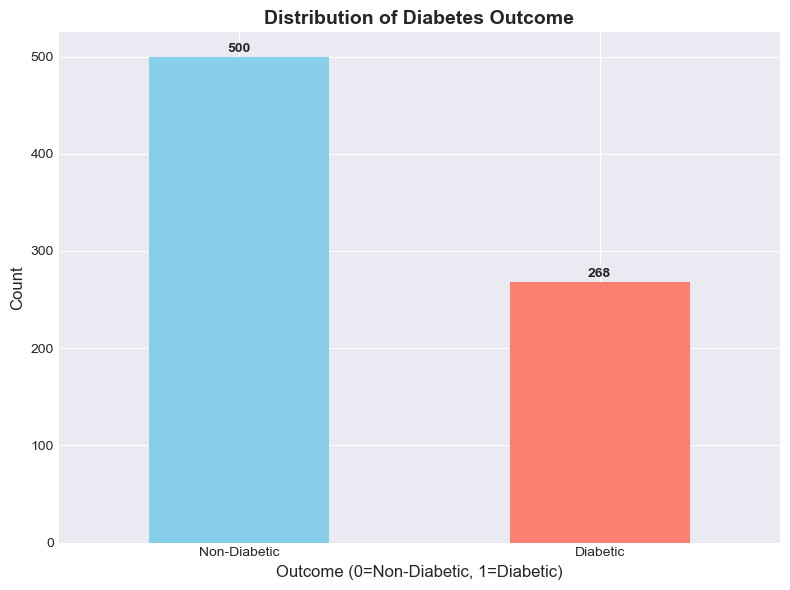

In [ ]:
# Outcome distribution
print("="*80)
print("OUTCOME DISTRIBUTION")
print("="*80)
outcome_counts = df['Outcome'].value_counts()
outcome_pct = df['Outcome'].value_counts(normalize=True) * 100

print(f"\nNon-Diabetic (Outcome = 0): {outcome_counts[0]} ({outcome_pct[0]:.2f}%)")
if 1 in outcome_counts:
    print(f"Diabetic (Outcome = 1): {outcome_counts[1]} ({outcome_pct[1]:.2f}%)")

# Visualize outcome distribution
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)
outcome_counts.plot(kind='bar', ax=ax, color=['skyblue', 'salmon'], edgecolor='black', linewidth=1)
ax.set_title('Distribution of Diabetes Outcome', fontsize=14, fontweight='bold')
ax.set_xlabel('Outcome (0=Non-Diabetic, 1=Diabetic)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticklabels(['Non-Diabetic', 'Diabetic'], rotation=0)
ax.grid(False)
for i, v in enumerate(outcome_counts):
    ax.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


In [8]:
# Statistics by outcome
print("="*80)
print("DESCRIPTIVE STATISTICS BY OUTCOME")
print("="*80)

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("\nNon-Diabetic (Outcome = 0):")
print(df[df['Outcome'] == 0][features].describe())

print("\n\nDiabetic (Outcome = 1):")
print(df[df['Outcome'] == 1][features].describe())


DESCRIPTIVE STATISTICS BY OUTCOME

Non-Diabetic (Outcome = 0):
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   500.000000  500.000000      500.00000     500.000000  500.000000   
mean      3.298000  110.700000       70.80600      25.224000  106.080000   
std       3.017185   24.712901       11.93286       9.113503   78.691208   
min       0.000000   44.000000       24.00000       7.000000   15.000000   
25%       1.000000   93.000000       63.50000      20.000000   79.000000   
50%       2.000000  107.500000       70.00000      21.000000   79.000000   
75%       5.000000  125.000000       78.00000      31.000000  105.000000   
max      13.000000  197.000000      122.00000      60.000000  744.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  500.000000                500.000000  500.000000  
mean    30.880066                  0.429734   31.190000  
std      6.503051                  0.299085   11.667655  
min     18.200000   

## 4. Visualizations

### 4.1 Feature Distributions


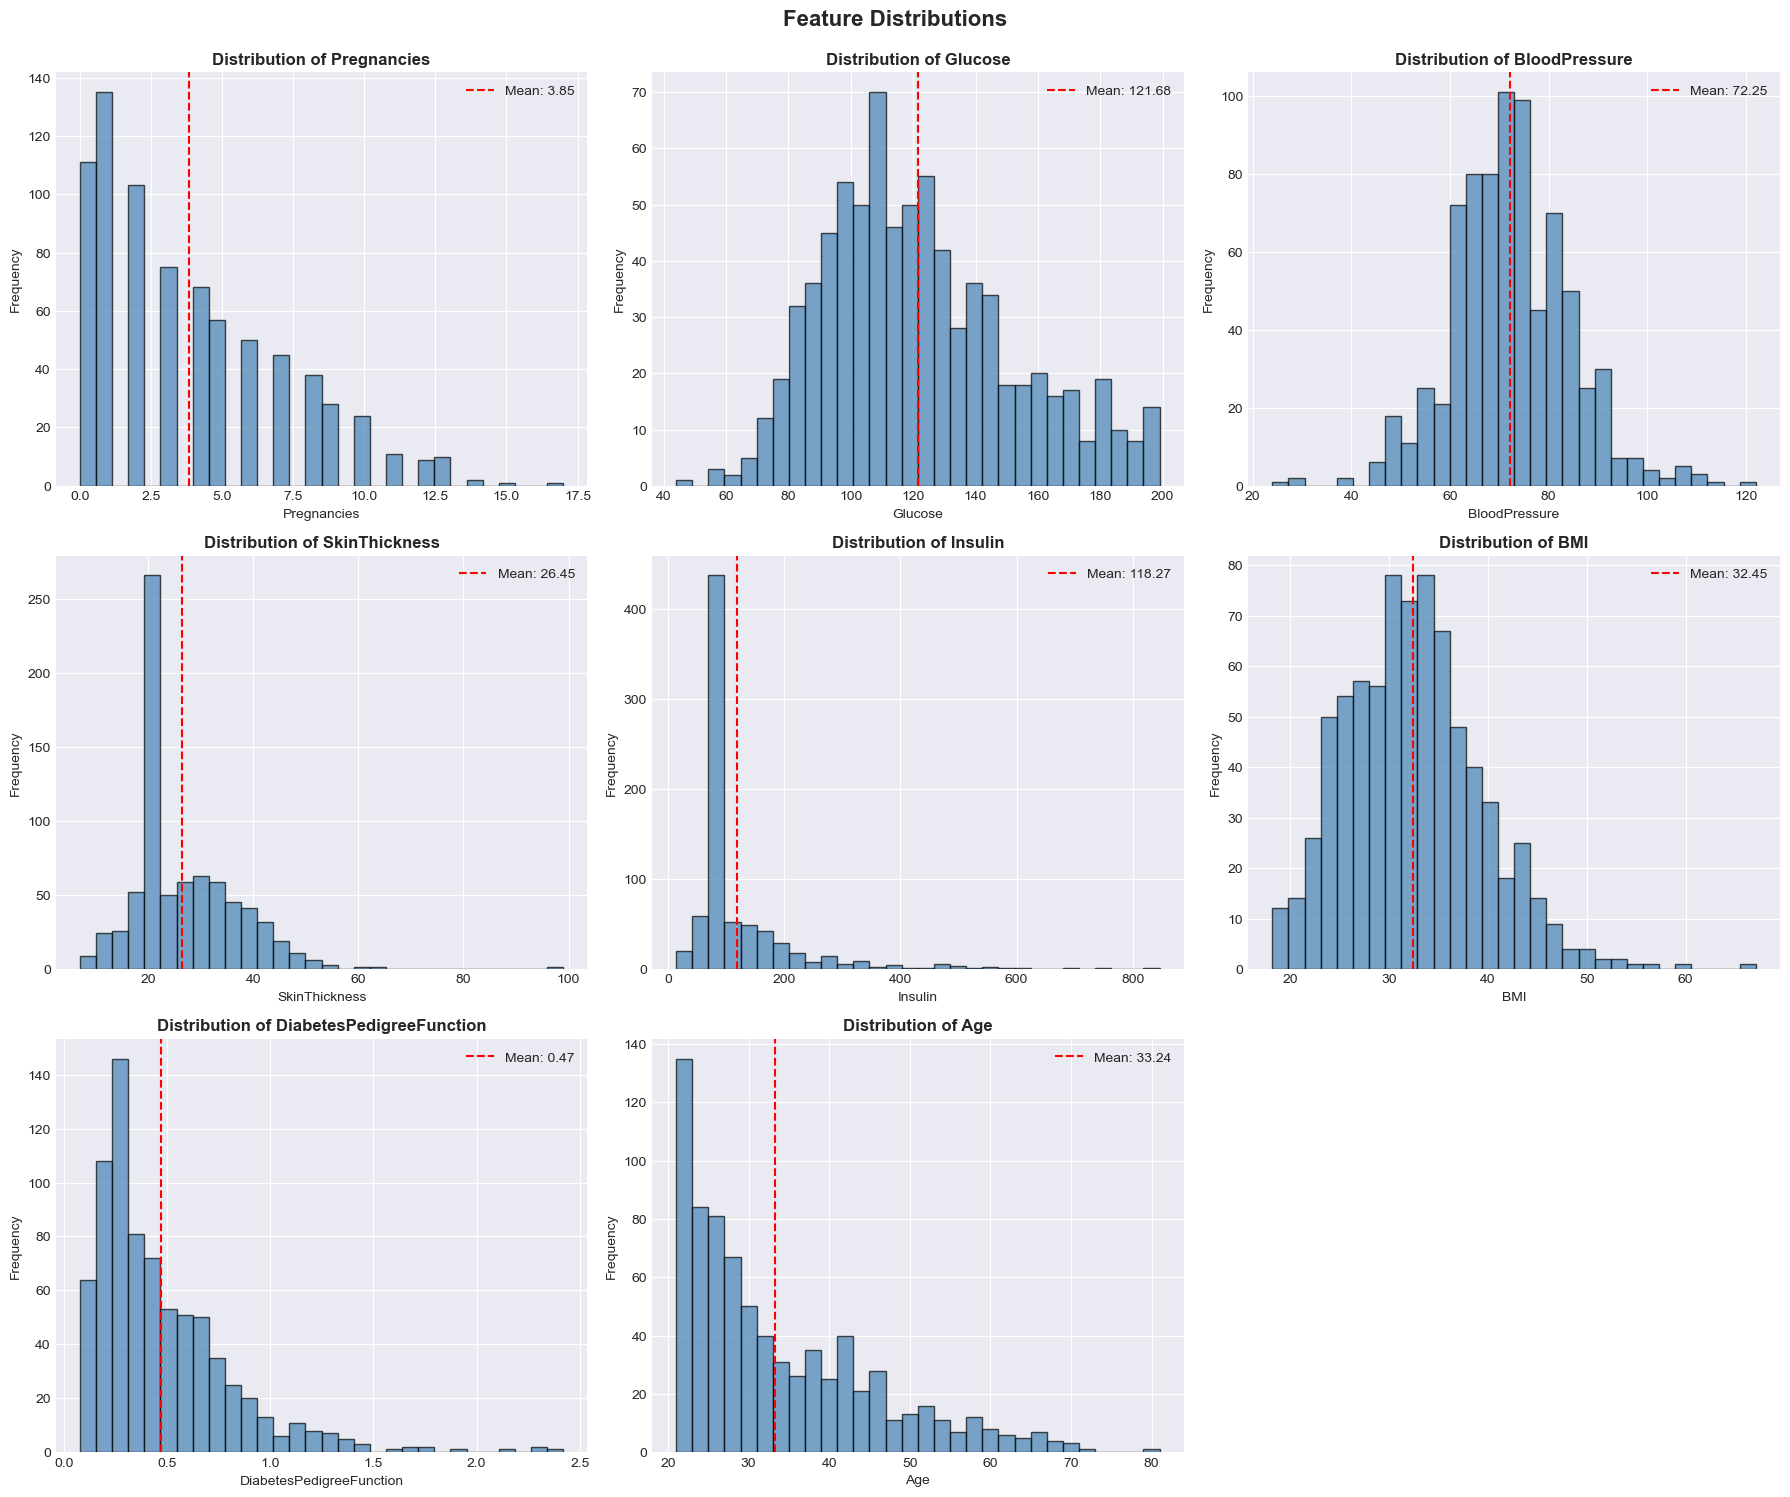

In [ ]:
# Histograms for all features
fig, axes = plt.subplots(3, 3, figsize=(18, 15), dpi=300)
axes = axes.ravel()

for idx, feature in enumerate(features):
    df[feature].hist(bins=30, ax=axes[idx], edgecolor='black', alpha=1.0, color='steelblue', linewidth=1)
    axes[idx].set_title(f'Distribution of {feature}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(feature, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].axvline(df[feature].mean(), color='red', linestyle='--', linewidth=1.5,
               label=f'Mean: {df[feature].mean():.2f}')
    axes[idx].grid(False)
    axes[idx].legend()

# Remove the last empty subplot
fig.delaxes(axes[8])
plt.suptitle('Feature Distributions', fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


### 4.2 Box Plots by Outcome


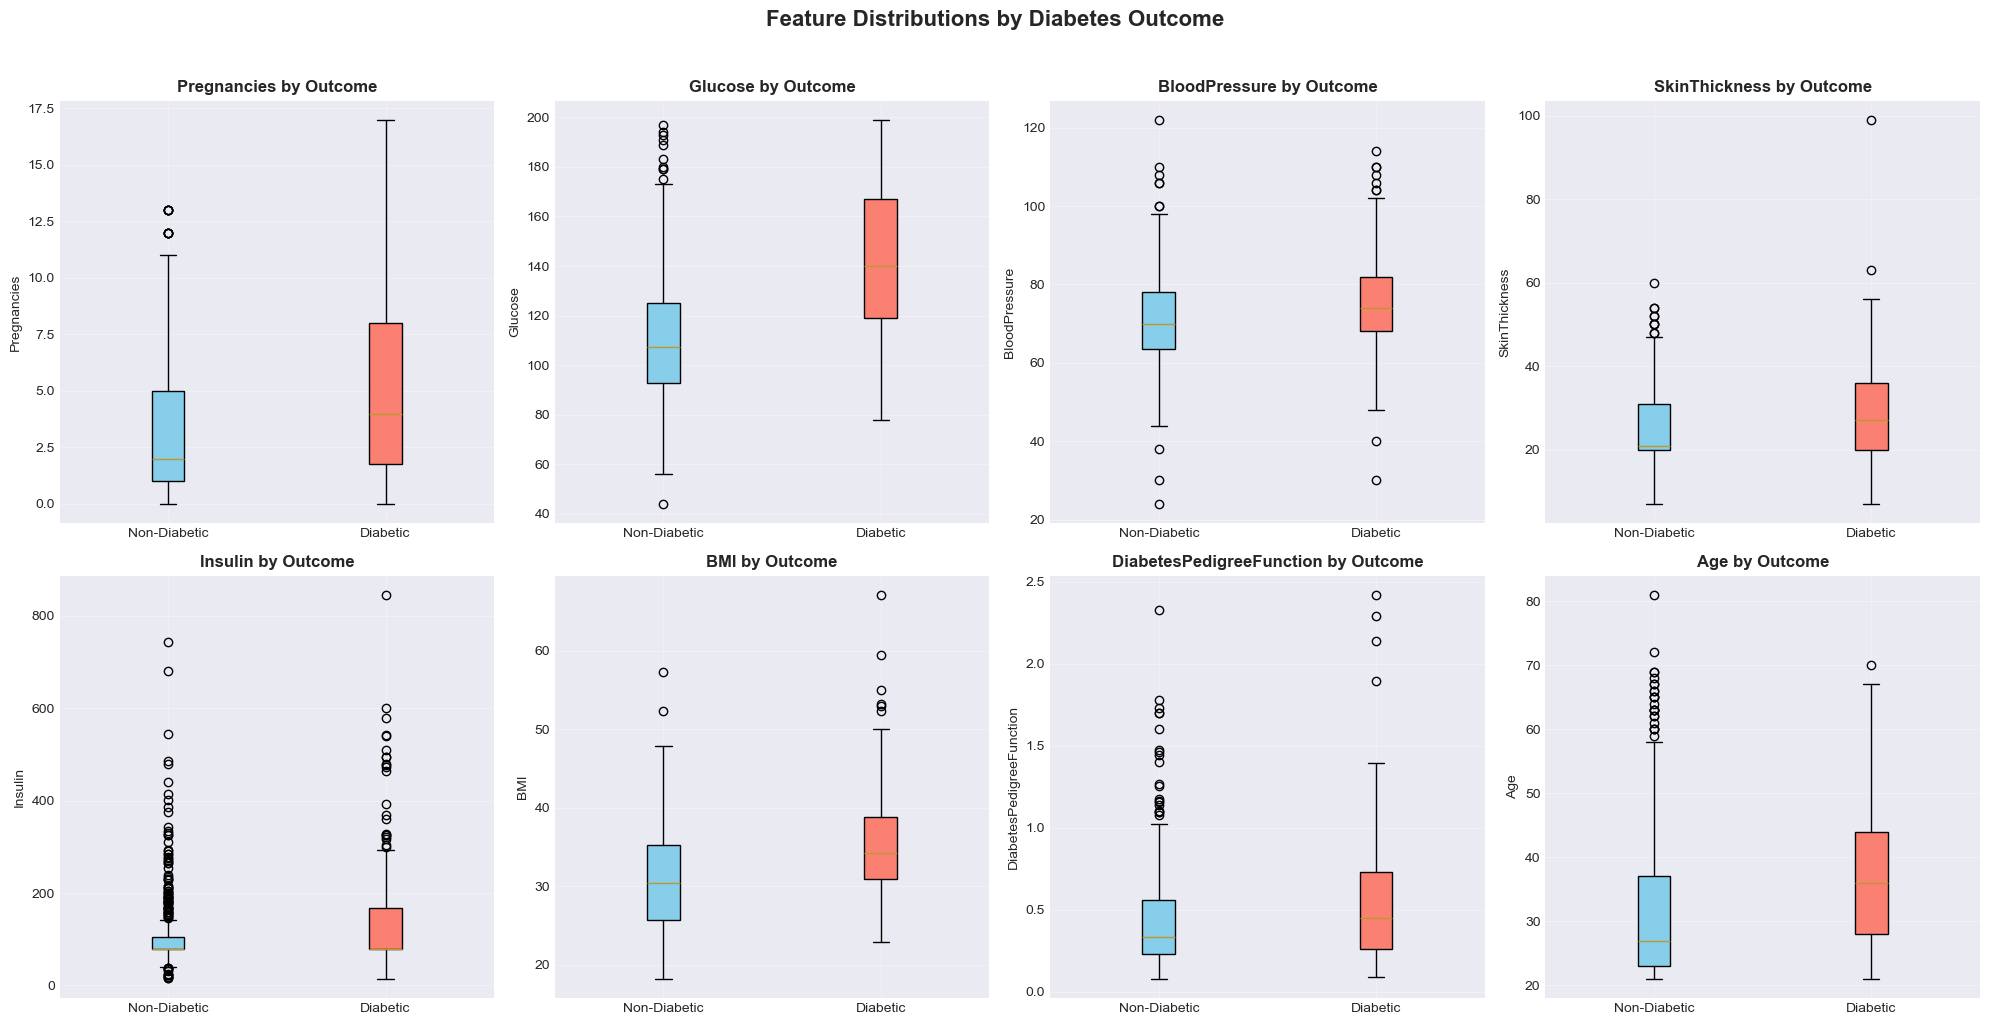

In [ ]:
# Box plots comparing features by outcome
fig, axes = plt.subplots(2, 4, figsize=(20, 10), dpi=300)
axes = axes.ravel()

for idx, feature in enumerate(features):
    data_0 = df[df['Outcome'] == 0][feature]
    data_1 = df[df['Outcome'] == 1][feature]
    bp = axes[idx].boxplot([data_0, data_1], labels=['Non-Diabetic', 'Diabetic'], patch_artist=True)
    bp['boxes'][0].set_facecolor('skyblue')
    bp['boxes'][0].set_edgecolor('black')
    bp['boxes'][0].set_linewidth(1)
    bp['boxes'][1].set_facecolor('salmon')
    bp['boxes'][1].set_edgecolor('black')
    bp['boxes'][1].set_linewidth(1)
    axes[idx].set_title(f'{feature} by Outcome', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].grid(False)

plt.suptitle('Feature Distributions by Diabetes Outcome', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


### 4.3 Correlation Analysis


CORRELATION WITH OUTCOME

Features correlated with diabetes outcome:
  ↑ Glucose                  :  0.493
  ↑ BMI                      :  0.312
  ↑ Age                      :  0.238
  ↑ Pregnancies              :  0.222
  ↑ Insulin                  :  0.179
  ↑ DiabetesPedigreeFunction :  0.174
  ↑ SkinThickness            :  0.172
  ↑ BloodPressure            :  0.163


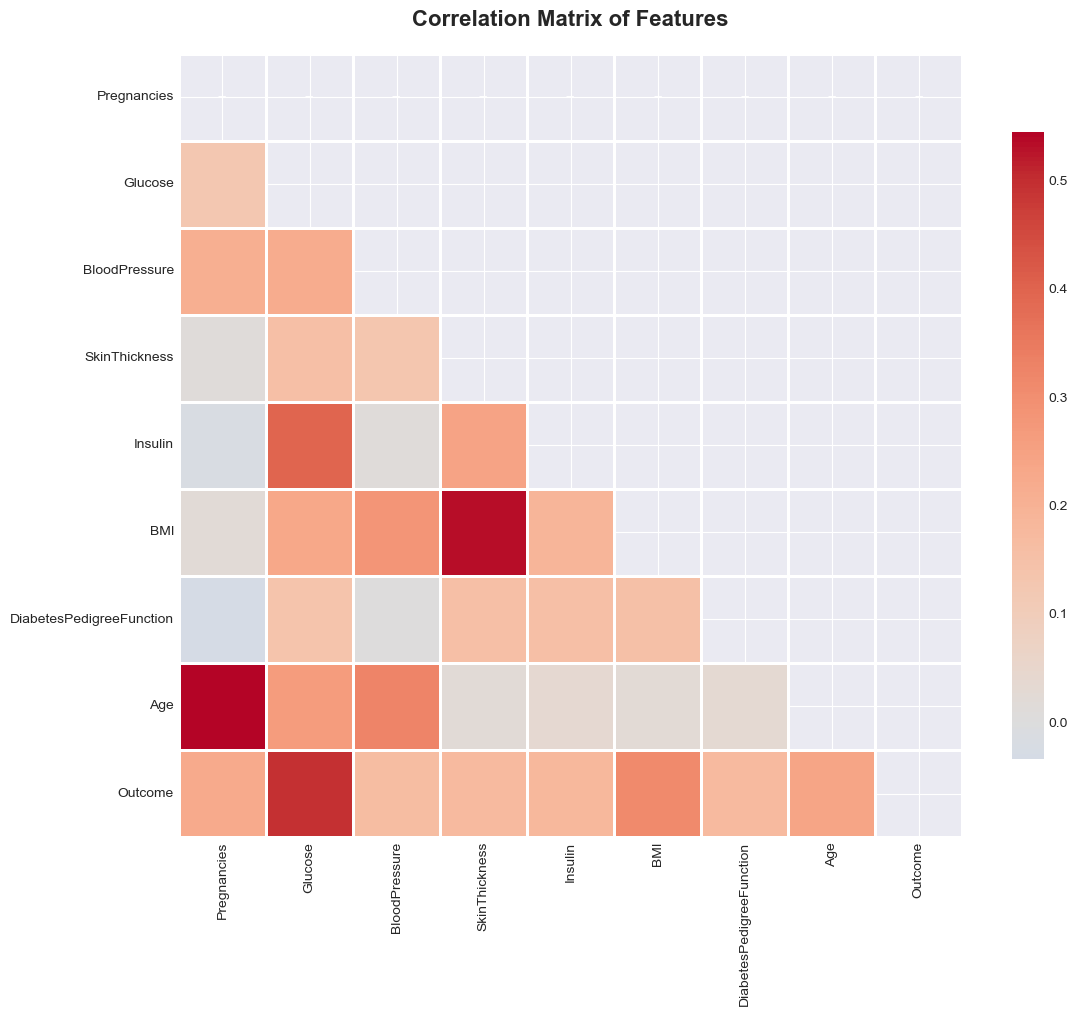

In [ ]:
# Correlation matrix
correlation_matrix = df.corr()
print("="*80)
print("CORRELATION WITH OUTCOME")
print("="*80)
outcome_corr = correlation_matrix['Outcome'].sort_values(ascending=False)
outcome_corr = outcome_corr[outcome_corr.index != 'Outcome']
print("\nFeatures correlated with diabetes outcome:")
for feature, corr in outcome_corr.items():
    direction = "↑" if corr > 0 else "↓"
    print(f"  {direction} {feature:25s}: {corr:6.3f}")

# Visualize correlation heatmap
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1,
            cbar_kws={"shrink": 0.8}, ax=ax)
ax.set_title('Correlation Matrix of Features', fontsize=16, fontweight='bold', pad=20)
ax.grid(False)
plt.tight_layout()
plt.show()


### 4.4 Key Features Comparison


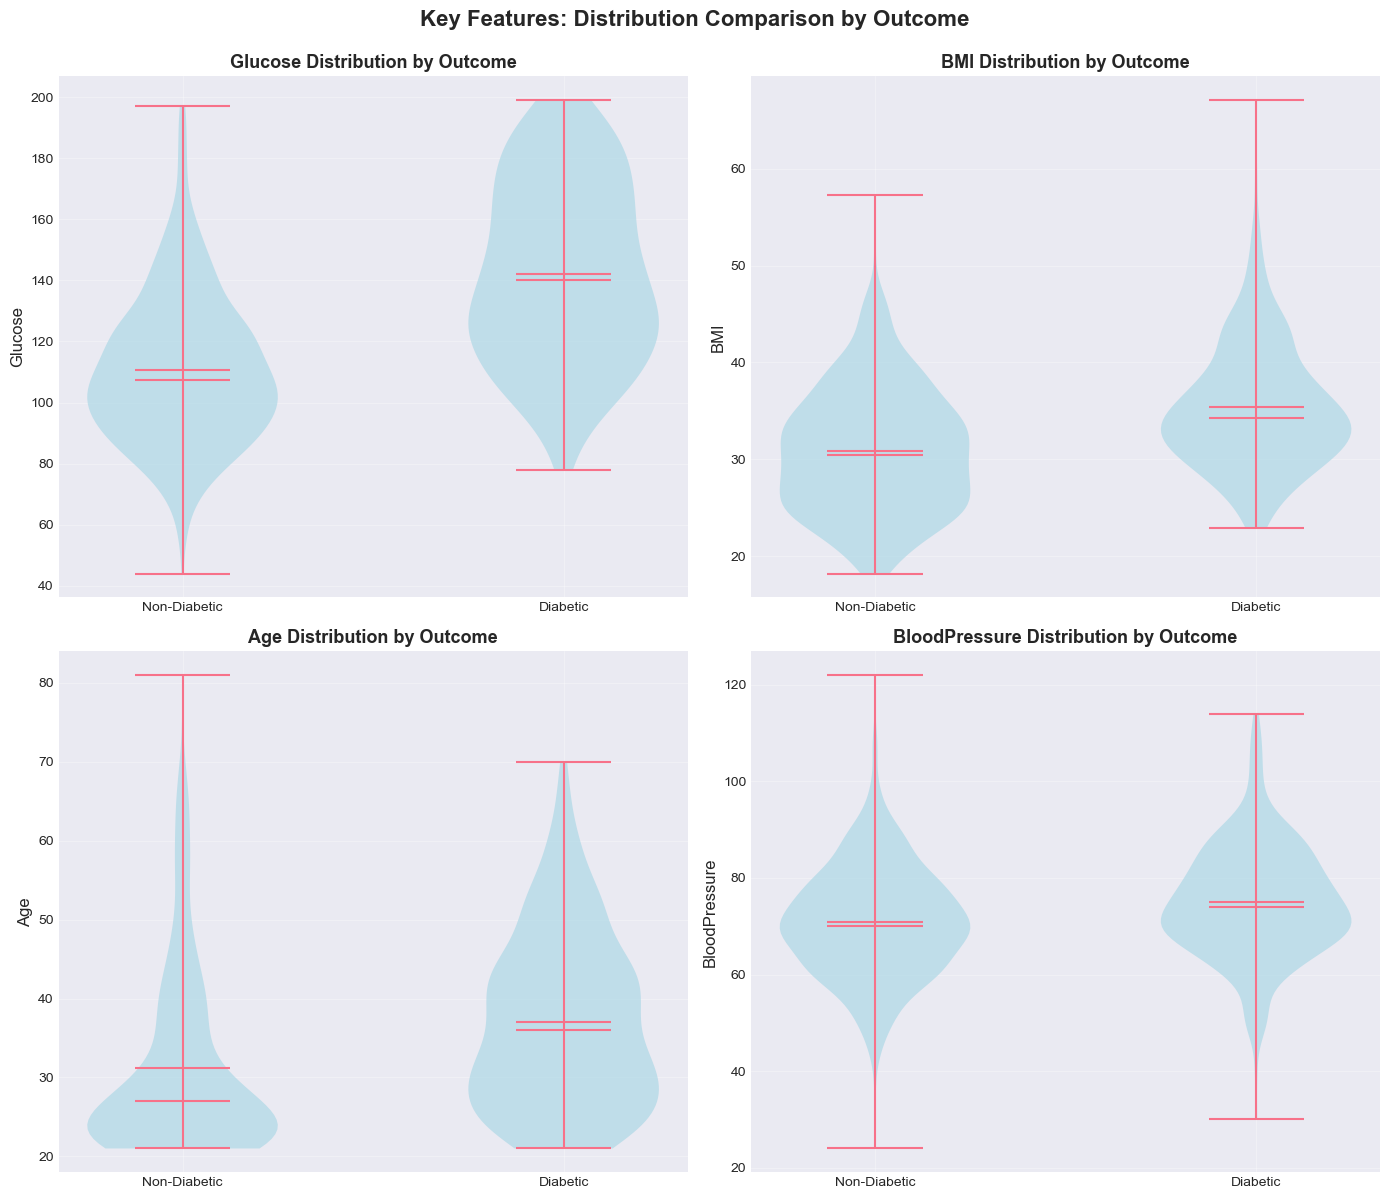

In [ ]:
# Violin plots for key features
key_features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
fig, axes = plt.subplots(2, 2, figsize=(14, 12), dpi=300)
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    data_0 = df[df['Outcome'] == 0][feature]
    data_1 = df[df['Outcome'] == 1][feature]
    data_to_plot = [data_0, data_1]
    parts = axes[idx].violinplot(data_to_plot, positions=[0, 1], showmeans=True, showmedians=True)
    for pc in parts['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_alpha(1.0)
        pc.set_edgecolor('black')
        pc.set_linewidth(1)
    axes[idx].set_xticks([0, 1])
    axes[idx].set_xticklabels(['Non-Diabetic', 'Diabetic'])
    axes[idx].set_ylabel(feature, fontsize=12)
    axes[idx].set_title(f'{feature} Distribution by Outcome', fontsize=13, fontweight='bold')
    axes[idx].grid(False)

plt.suptitle('Key Features: Distribution Comparison by Outcome', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()


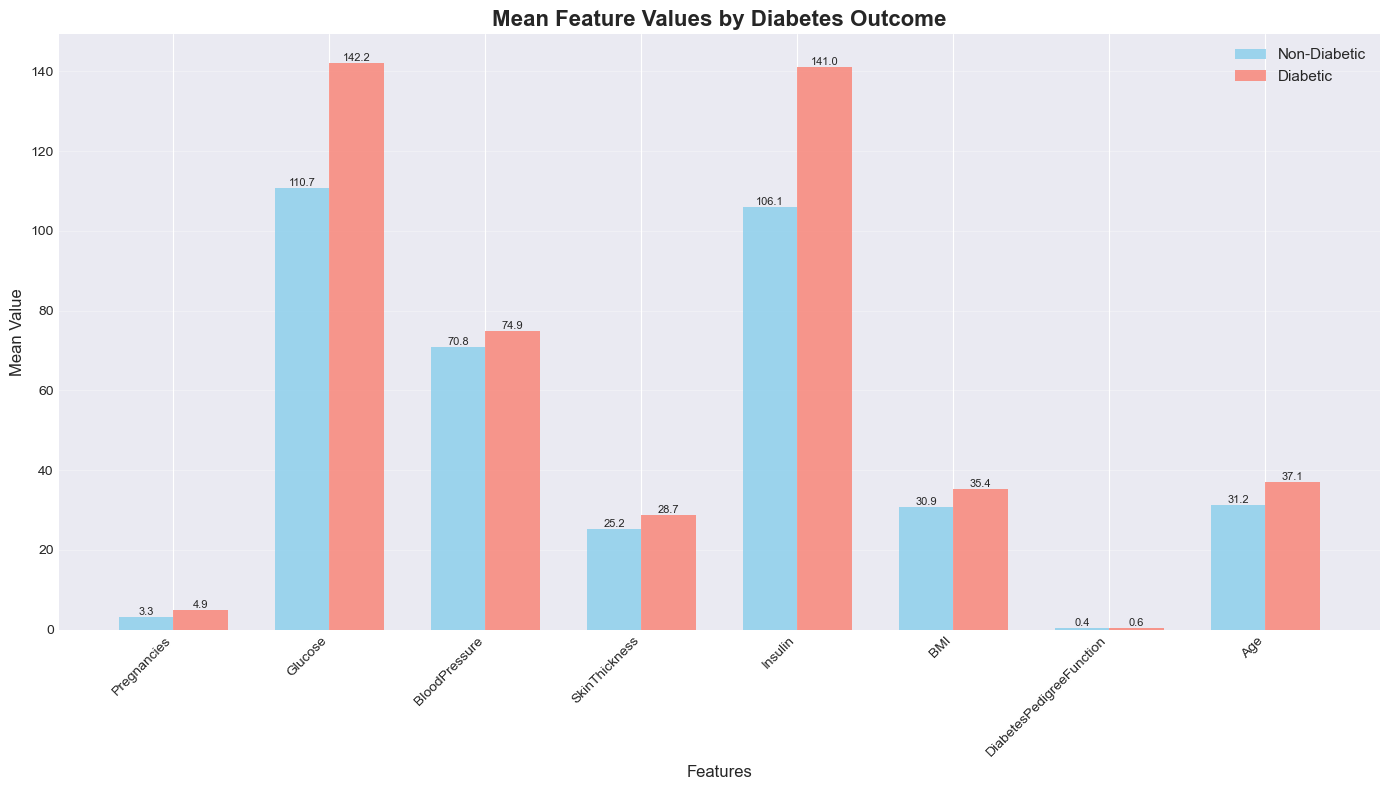

In [ ]:
# Mean comparison by outcome
fig, ax = plt.subplots(figsize=(14, 8), dpi=300)
means_by_outcome = df.groupby('Outcome')[features].mean()
x = np.arange(len(features))
width = 0.35

bars1 = ax.bar(x - width/2, means_by_outcome.loc[0], width, 
               label='Non-Diabetic', color='skyblue', alpha=1.0, edgecolor='black', linewidth=1)
bars2 = ax.bar(x + width/2, means_by_outcome.loc[1], width, 
               label='Diabetic', color='salmon', alpha=1.0, edgecolor='black', linewidth=1)

ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_title('Mean Feature Values by Diabetes Outcome', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(False)

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()


### 4.5 Pair Plot for Key Features


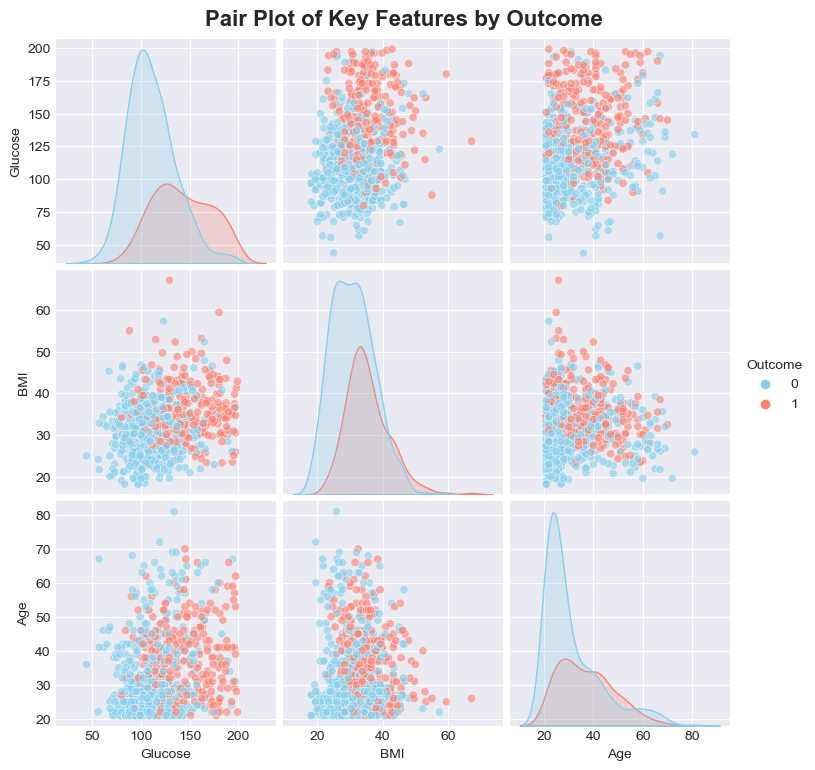

In [ ]:
# Pair plot for key features
key_features_pair = ['Glucose', 'BMI', 'Age', 'Outcome']
g = sns.pairplot(df[key_features_pair], hue='Outcome', diag_kind='kde', 
                 palette={0: 'skyblue', 1: 'salmon'}, plot_kws={'alpha': 1.0, 'edgecolor': 'black', 'linewidth': 0.5})
g.fig.set_dpi(300)
g.fig.suptitle('Pair Plot of Key Features by Outcome', fontsize=16, fontweight='bold', y=1.02)
# Remove grids from all subplots
for ax in g.axes.flat:
    ax.grid(False)
plt.show()


## 5. Statistical Significance Tests


In [15]:
# T-tests comparing means between Diabetic and Non-Diabetic groups
print("="*80)
print("STATISTICAL SIGNIFICANCE TESTS (T-tests)")
print("="*80)
print("H0: No difference in means between groups")
print("H1: Means are significantly different")
print("\n" + "-"*70)
print(f"{'Feature':<25} {'t-statistic':<15} {'p-value':<15} {'Significant'}")
print("-"*70)

significant_features = []
for feature in features:
    non_diabetic = df[df['Outcome'] == 0][feature]
    diabetic = df[df['Outcome'] == 1][feature]
    
    # Remove zeros for features where zero doesn't make biological sense
    if feature in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
        non_diabetic = non_diabetic[non_diabetic > 0]
        diabetic = diabetic[diabetic > 0]
    
    if len(non_diabetic) > 0 and len(diabetic) > 0:
        t_stat, p_value = stats.ttest_ind(non_diabetic, diabetic)
        is_significant = "Yes" if p_value < 0.05 else "No"
        
        if p_value < 0.05:
            significant_features.append(feature)
        
        print(f"{feature:<25} {t_stat:>10.4f}     {p_value:>10.4f}     {is_significant}")

print("-"*70)
print(f"\nFeatures with statistically significant differences (p < 0.05): {len(significant_features)}")
if significant_features:
    print(f"Significant features: {', '.join(significant_features)}")


STATISTICAL SIGNIFICANCE TESTS (T-tests)
H0: No difference in means between groups
H1: Means are significantly different

----------------------------------------------------------------------
Feature                   t-statistic     p-value         Significant
----------------------------------------------------------------------
Pregnancies                  -6.2984         0.0000     Yes
Glucose                     -15.6781         0.0000     Yes
BloodPressure                -4.5690         0.0000     Yes
SkinThickness                -4.8283         0.0000     Yes
Insulin                      -5.0266         0.0000     Yes
BMI                          -9.0970         0.0000     Yes
DiabetesPedigreeFunction     -4.8858         0.0000     Yes
Age                          -6.7927         0.0000     Yes
----------------------------------------------------------------------

Features with statistically significant differences (p < 0.05): 8
Significant features: Pregnancies, Glucose, Bloo

## 6. Key Insights and Summary


In [16]:
# Generate summary insights
print("="*80)
print("KEY INSIGHTS AND SUMMARY")
print("="*80)

print("\n📊 DATASET OVERVIEW:")
print(f"  • Total samples: {len(df)}")
print(f"  • Features: {len(features)}")
print(f"  • Diabetic cases: {outcome_counts[1] if 1 in outcome_counts else 0} ({outcome_pct[1]:.1f}% if 1 in outcome_pct else 0)")
print(f"  • Non-diabetic cases: {outcome_counts[0]} ({outcome_pct[0]:.1f}%)")

print("\n🔍 DATA QUALITY FINDINGS:")
zero_total = sum([zero_counts[col]['count'] for col in zero_check_cols])
print(f"  • Total biologically implausible zeros: {zero_total}")
for col in zero_check_cols:
    if zero_counts[col]['count'] > 0:
        print(f"    - {col}: {zero_counts[col]['count']} zeros ({zero_counts[col]['percentage']:.1f}%)")
print("  • Note: These zeros likely represent missing data rather than actual measurements")

print("\n📈 KEY STATISTICAL DIFFERENCES (Diabetic vs Non-Diabetic):")
for feature in significant_features:
    mean_0 = df[df['Outcome'] == 0][feature].mean()
    mean_1 = df[df['Outcome'] == 1][feature].mean()
    diff = mean_1 - mean_0
    diff_pct = (diff / mean_0) * 100 if mean_0 != 0 else 0
    print(f"  • {feature}:")
    print(f"    - Non-Diabetic mean: {mean_0:.2f}")
    print(f"    - Diabetic mean: {mean_1:.2f}")
    print(f"    - Difference: {diff:+.2f} ({diff_pct:+.1f}%)")

print("\n💡 TOP RISK FACTORS (by correlation magnitude):")
top_risk = outcome_corr.abs().sort_values(ascending=False).head(5)
for i, (feature, corr) in enumerate(top_risk.items(), 1):
    direction = "Higher" if outcome_corr[feature] > 0 else "Lower"
    print(f"  {i}. {feature}: {direction} values associated with diabetes (correlation: {outcome_corr[feature]:.3f})")

print("\n🎯 CONCLUSIONS:")
print("  1. The dataset shows clear differences between diabetic and non-diabetic groups")
print("  2. Glucose, BMI, Age, and Diabetes Pedigree Function are key risk factors")
print("  3. Higher glucose levels, BMI, and age are associated with increased diabetes risk")
print("  4. Data quality issues exist with many zero values that likely represent missing data")
print("  5. Further analysis could benefit from handling missing values appropriately")

print("\n" + "="*80)


KEY INSIGHTS AND SUMMARY

📊 DATASET OVERVIEW:
  • Total samples: 768
  • Features: 8
  • Diabetic cases: 268 (34.9% if 1 in outcome_pct else 0)
  • Non-diabetic cases: 500 (65.1%)

🔍 DATA QUALITY FINDINGS:
  • Total biologically implausible zeros: 0
  • Note: These zeros likely represent missing data rather than actual measurements

📈 KEY STATISTICAL DIFFERENCES (Diabetic vs Non-Diabetic):
  • Pregnancies:
    - Non-Diabetic mean: 3.30
    - Diabetic mean: 4.87
    - Difference: +1.57 (+47.5%)
  • Glucose:
    - Non-Diabetic mean: 110.70
    - Diabetic mean: 142.15
    - Difference: +31.45 (+28.4%)
  • BloodPressure:
    - Non-Diabetic mean: 70.81
    - Diabetic mean: 74.94
    - Difference: +4.14 (+5.8%)
  • SkinThickness:
    - Non-Diabetic mean: 25.22
    - Diabetic mean: 28.73
    - Difference: +3.51 (+13.9%)
  • Insulin:
    - Non-Diabetic mean: 106.08
    - Diabetic mean: 141.01
    - Difference: +34.93 (+32.9%)
  • BMI:
    - Non-Diabetic mean: 30.88
    - Diabetic mean: 35.38
 